In [3]:
import numpy as np
import torch 
import torch.linalg as linal
import matplotlib.pyplot as plt

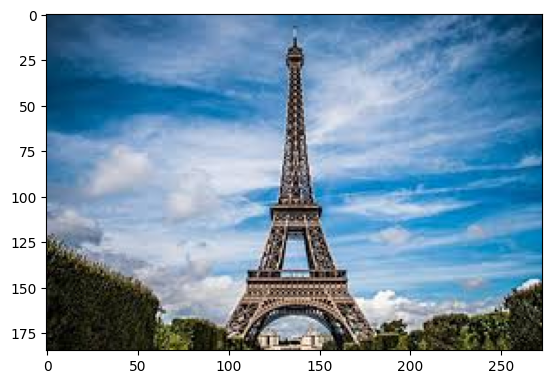

In [91]:
#importing Sample image
image = torch.tensor(plt.imread("Sample.jpeg"),dtype=torch.int64)
plt.imshow(image)
plt.show()

In [92]:
#functions



def pre_process(data=torch.tensor,cluster_num=int):
    temp = torch.reshape(data,shape=(data.shape[0]*data.shape[1],data.shape[2]))
    clusters = torch.split(temp,cluster_num)
    centeroids = []
    for i in clusters:
        centeroids.append(np.mean(i.numpy(),axis=0))
    return temp,clusters,centeroids


def assign_clusters(data,centroids):
    cis = []
    clusters = [[]*len(centroids)]
    for point in data:
        nearest_centroid = np.argmin([np.linalg.norm(point-i) for i in centroids])
        clusters[nearest_centroid].append(point)
        cis.append(nearest_centroid)
    
    return np.array(cis),np.array(clusters)

def Cost(data=torch.tensor,clusters=torch.tensor,cluster_index=torch.tensor):
    return torch.mean(torch.tensor([torch.linalg.norm(torch.tensor(data[i]-clusters[cluster_index[i]],dtype=torch.float))**2 for i in range(data.shape[0])]))

def K_means(image,cluster_num):
    required_dim = (image.shape[0]*image.shape[1],image.shape[2])
    data = np.reshape(image,required_dim)

    centroids = data[np.random.randint(0,required_dim[0],size=(cluster_num,))]

    cis,clusters = assign_clusters(data,centroids)

    converged = False



In [93]:
d,c,cc = pre_process(image,4)

In [98]:
np.reshape()

3